[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/uf-bme/bme3053c/blob/main/files/homework_06_solutions.ipynb)

In [1]:
import numpy as np

import matplotlib.pyplot as plt

# Enable inline plotting
%matplotlib inline

In [2]:
def generate_star(center=(0, 0), num_points=5, outer_radius=1, inner_radius=0.5,homogeneous=False):
    '''
    This function generates the coordinates of a star shape based on the specified number of points,
    outer radius, inner radius, and center coordinates. The star is created by alternating between the
    outer and inner radii at calculated angles, resulting in a visually appealing star pattern.
    '''
    angles = np.linspace(np.pi/2, 5*np.pi/2, num_points*2, endpoint=False)
    radii = np.array([outer_radius, inner_radius] * num_points)
    x = radii * np.cos(angles) + center[0]
    y = radii * np.sin(angles) + center[1]
    return np.column_stack((x, y)) if not homogeneous else np.column_stack((x, y, np.ones(num_points*2)))

def plot_star(ax, star, title):
    ax.plot(star[:, 0], star[:, 1], 'b-')
    ax.plot([star[-1, 0], star[0, 0]], [star[-1, 1], star[0, 1]], 'b-')  # Connect last to first
    ax.set_title(title)
    ax.axis('equal')

    ax.grid(True)  # Add grid

    star_center = np.mean(star, axis=0)
    arrow_start = star_center

    vector_to_point = star[0] - star_center
    direction = vector_to_point/np.linalg.norm(vector_to_point)  # Normalize the direction vector
    arrow_length = np.linalg.norm(vector_to_point)/2
    arrow_end = star_center + (arrow_length) * direction
    ax.annotate('', xy=arrow_end, xytext=arrow_start,
                arrowprops=dict(facecolor='green', shrink=0.05, width=2, headwidth=8))

def plot_stars(stars):
    if len(stars) == 1 or not isinstance(stars, list):
        print("There must be a list of multiple stars to plot")
        return
    num_stars = len(stars)
    fig, axs = plt.subplots(1, num_stars, figsize=(10, 5))
    for i, star in enumerate(stars):
        plot_star(axs[i], star[:,:2], f'Star {i+1}')


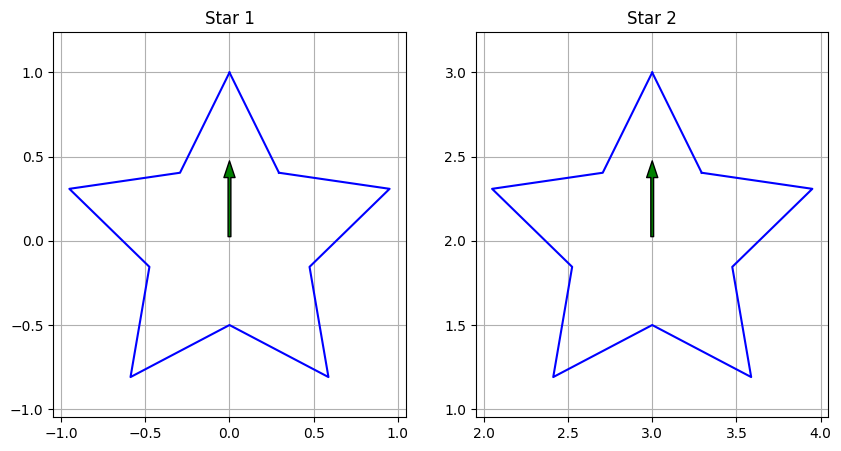

In [8]:
#Functions to create transformation matrices
def rotate(angle_degrees):
    angle_radians = np.radians(angle_degrees)
    cos_theta = np.cos(angle_radians)
    sin_theta = np.sin(angle_radians)
    return np.array([
        [cos_theta, -sin_theta,0],
        [sin_theta, cos_theta,0],
        [0,0,1],
    ])

def scale(sx,sy):
    return np.array([
        [sx, 0,0],
        [0, sy,0],
        [0,0,1],
    ])

def translate(tx, ty):
    return np.array([
        [1, 0, tx],
        [0, 1, ty],
        [0, 0, 1]
    ])


star=generate_star(center=(0,0),homogeneous=True)

T=translate(3,2)
S=scale(0.5,0.5)


transformed_star = (T @ star.T).T

plot_stars([star,transformed_star])

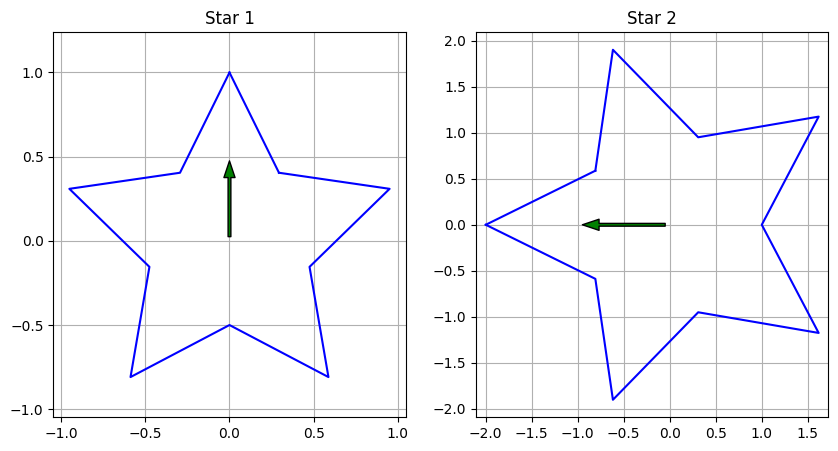

In [9]:
star=generate_star(center=(0,0),homogeneous=True)

R=rotate(90)

S=scale(2,2)


combined_transform = S @ R

transformed_star = (combined_transform @ star.T).T

plot_stars([star,transformed_star])

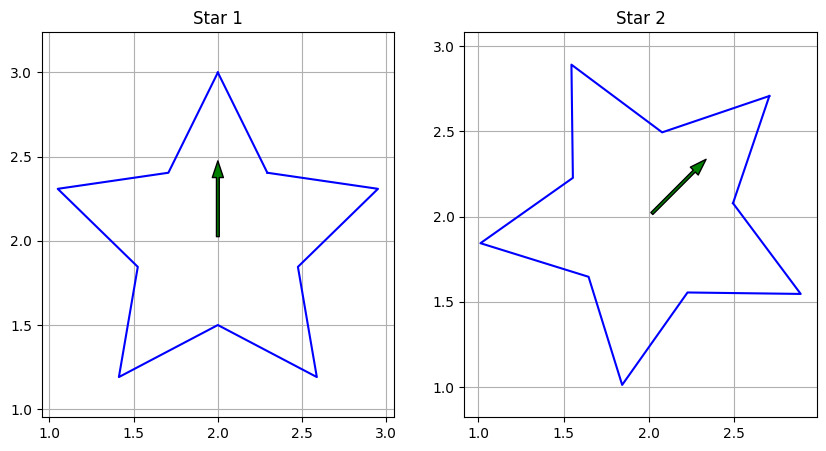

In [10]:
star=generate_star(center=(2,2),homogeneous=True)

R=rotate(-45)

T1=translate(-2,-2)
T2=translate(2,2)

combined_transform = T2 @ R @ T1

transformed_star = (combined_transform @ star.T).T

plot_stars([star,transformed_star])

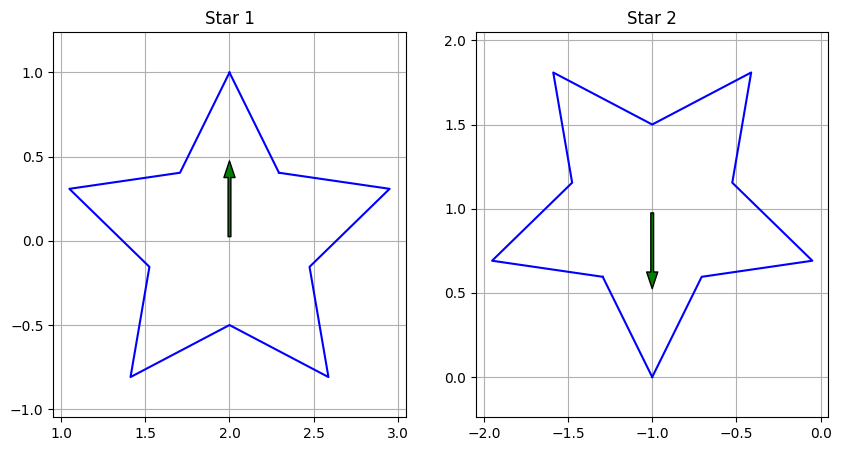

In [13]:
star=generate_star(center=(2,0),homogeneous=True)

R=rotate(180)

T1=translate(-2,0)
T2=translate(-1,1)

combined_transform = T2 @ R @ T1

transformed_star = (combined_transform @ star.T).T

plot_stars([star,transformed_star])